In [3]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('C:/Users/Tejas/Desktop/FVRset/FVRdataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Tejas/Desktop/FVRset/FVRdataset\test\apple\Image_1.jpg
C:/Users/Tejas/Desktop/FVRset/FVRdataset\test\apple\Image_10.jpg
C:/Users/Tejas/Desktop/FVRset/FVRdataset\test\apple\Image_2.jpg
C:/Users/Tejas/Desktop/FVRset/FVRdataset\test\apple\Image_3.jpg
C:/Users/Tejas/Desktop/FVRset/FVRdataset\test\apple\Image_4.jpg
C:/Users/Tejas/Desktop/FVRset/FVRdataset\test\apple\Image_5.jpg
C:/Users/Tejas/Desktop/FVRset/FVRdataset\test\apple\Image_6.JPG
C:/Users/Tejas/Desktop/FVRset/FVRdataset\test\apple\Image_7.jpg
C:/Users/Tejas/Desktop/FVRset/FVRdataset\test\apple\Image_8.jpg
C:/Users/Tejas/Desktop/FVRset/FVRdataset\test\apple\Image_9.jpg
C:/Users/Tejas/Desktop/FVRset/FVRdataset\test\banana\Image_1.jpg
C:/Users/Tejas/Desktop/FVRset/FVRdataset\test\banana\Image_10.jpg
C:/Users/Tejas/Desktop/FVRset/FVRdataset\test\banana\Image_2.jpg
C:/Users/Tejas/Desktop/FVRset/FVRdataset\test\banana\Image_3.jpg
C:/Users/Tejas/Desktop/FVRset/FVRdataset\test\banana\Image_4.jpg
C:/Users/Tejas/Desktop/FVRset/FVR

In [4]:
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import load_img,img_to_array
print(tf.__version__)

2.6.0


In [5]:
train_dir = Path('../FVRset/FVRdataset/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [6]:
test_dir = Path('../FVRset/FVRdataset/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [7]:
val_dir = Path('../FVRset/FVRdataset/validation')
val_filepaths = list(val_dir.glob(r'**/*.jpg'))

In [8]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("\\")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [9]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [10]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2855

Number of different labels: 36

Labels: ['watermelon' 'cauliflower' 'jalepeno' 'paprika' 'cabbage' 'pear'
 'beetroot' 'peas' 'capsicum' 'pomegranate' 'tomato' 'mango' 'spinach'
 'grapes' 'lemon' 'apple' 'carrot' 'pineapple' 'cucumber' 'garlic'
 'lettuce' 'onion' 'chilli pepper' 'bell pepper' 'ginger' 'corn'
 'sweetcorn' 'potato' 'sweetpotato' 'eggplant' 'turnip' 'orange'
 'soy beans' 'kiwi' 'raddish' 'banana']


In [11]:
train_df.head(6)

,Filepath,Label
0,..\FVRset\FVRdataset\train\watermelon\Image_81...,watermelon
1,..\FVRset\FVRdataset\train\cauliflower\Image_5...,cauliflower
2,..\FVRset\FVRdataset\train\jalepeno\Image_65.jpg,jalepeno
3,..\FVRset\FVRdataset\train\cauliflower\Image_2...,cauliflower
4,..\FVRset\FVRdataset\train\watermelon\Image_79...,watermelon
5,..\FVRset\FVRdataset\train\jalepeno\Image_38.jpg,jalepeno


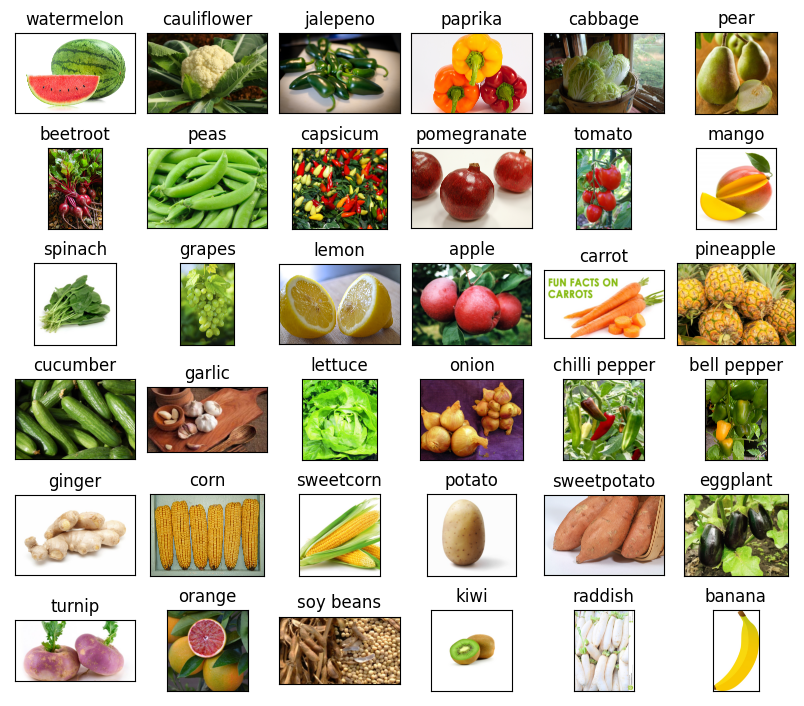

In [12]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [13]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [14]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2855 validated image filenames belonging to 36 classes.


In [15]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 340 validated image filenames belonging to 36 classes.


In [16]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 340 validated image filenames belonging to 36 classes.


In [17]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9420800/9406464 [==============================] - 4s 0us/step


In [18]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
35/90 [==========>...................] - ETA: 1:16 - loss: 2.7337 - accuracy: 0.3196

c:\Users\Tejas\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\TiffImagePlugin.py:793: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


90/90 [==============================] - 161s 2s/step - loss: 1.7311 - accuracy: 0.5384 - val_loss: 0.4530 - val_accuracy: 0.8882
Epoch 2/5
90/90 [==============================] - 112s 1s/step - loss: 0.5529 - accuracy: 0.8231 - val_loss: 0.2835 - val_accuracy: 0.9235
Epoch 3/5
90/90 [==============================] - 113s 1s/step - loss: 0.3208 - accuracy: 0.9058 - val_loss: 0.2532 - val_accuracy: 0.9294
Epoch 4/5
90/90 [==============================] - 113s 1s/step - loss: 0.2319 - accuracy: 0.9271 - val_loss: 0.1986 - val_accuracy: 0.9471
Epoch 5/5
90/90 [==============================] - 112s 1s/step - loss: 0.1485 - accuracy: 0.9534 - val_loss: 0.1733 - val_accuracy: 0.9529


In [19]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

['banana',
 'sweetcorn',
 'pomegranate',
 'garlic',
 'lettuce',
 'onion',
 'carrot',
 'capsicum',
 'sweetcorn',
 'banana',
 'raddish',
 'potato',
 'cucumber',
 'ginger',
 'cabbage',
 'pear',
 'garlic',
 'cabbage',
 'lettuce',
 'sweetpotato',
 'soy beans',
 'mango',
 'lemon',
 'sweetcorn',
 'sweetpotato',
 'soy beans',
 'mango',
 'pineapple',
 'beetroot',
 'cucumber',
 'beetroot',
 'orange',
 'cabbage',
 'apple',
 'ginger',
 'lemon',
 'jalepeno',
 'spinach',
 'bell pepper',
 'capsicum',
 'kiwi',
 'carrot',
 'chilli pepper',
 'beetroot',
 'chilli pepper',
 'onion',
 'bell pepper',
 'jalepeno',
 'cauliflower',
 'raddish',
 'potato',
 'turnip',
 'chilli pepper',
 'banana',
 'jalepeno',
 'onion',
 'sweetpotato',
 'potato',
 'sweetcorn',
 'beetroot',
 'pomegranate',
 'pomegranate',
 'tomato',
 'cucumber',
 'eggplant',
 'ginger',
 'sweetcorn',
 'cabbage',
 'mango',
 'beetroot',
 'pear',
 'cucumber',
 'turnip',
 'pineapple',
 'spinach',
 'paprika',
 'pomegranate',
 'onion',
 'grapes',
 'paprik

In [20]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [24]:
img = output('C:/Users/Tejas/Desktop/FVRset/FVRdataset/test/garlic/Image_7.jpg')
img

'garlic'

In [25]:
model.save('FVRM.h5')

c:\Users\Tejas\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
